In [83]:
import pandas as pd
import numpy as np

In [3]:
dataSet = pd.read_csv('Mall_Customers.csv')

In [32]:
dataSet.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [59]:
x = dataSet.iloc[:,3:5].values

In [60]:
from sklearn.cluster import estimate_bandwidth
bandwidth = estimate_bandwidth(x, quantile=0.2, n_samples = 200, n_jobs = -1, random_state = 42)
bandwidth

27.161411938994306

In [81]:
from sklearn.cluster import MeanShift
clustering = MeanShift(bandwidth= bandwidth, bin_seeding=True).fit(x)

In [85]:
clustering.cluster_centers_

array([[54.95402299, 48.73563218],
       [81.88888889, 81.5       ],
       [82.2       , 19.37142857]])

In [86]:
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

In [91]:
UniqueLables = np.unique(clustering.labels_)
n_cluster = len(UniqueLables)

In [95]:
dataSet['cluster_groups'] = clustering.labels_

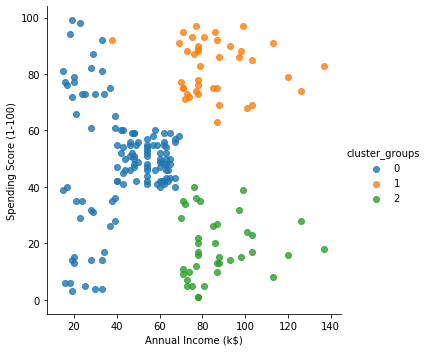

In [97]:
import seaborn as sns
facet = sns.lmplot(data = dataSet, x=dataSet.columns[3], y=dataSet.columns[4], hue = dataSet.columns[5],
                  fit_reg = False, legend = True, legend_out = True )